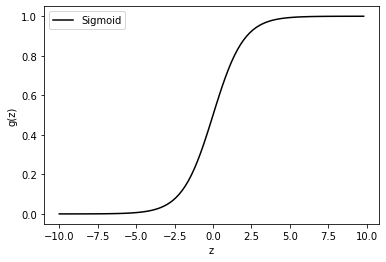

[Text(0, 0.5, 'x$_2$'), Text(0.5, 0, 'x$_1$'), None]

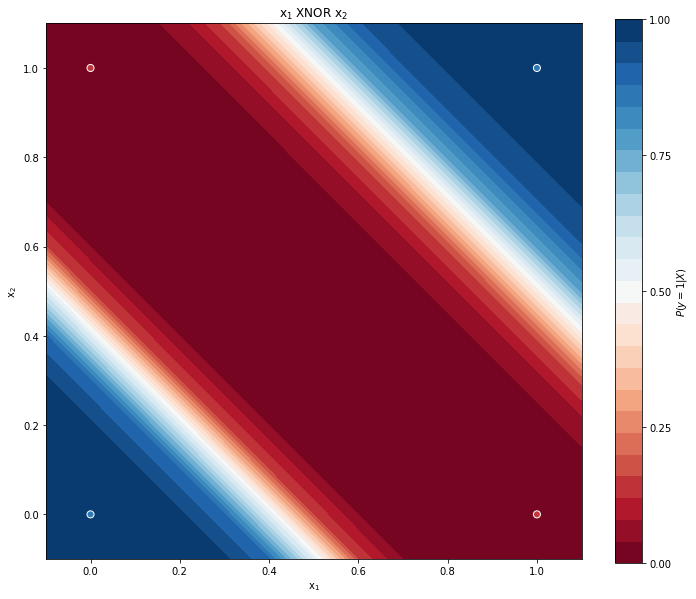

In [1]:
#Credit https://joelpendleton.github.io/XNOR-NeuralNet/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

x = np.arange(-10., 10., 0.2)
plt.plot(x,sigmoid(x), '-k', label="Sigmoid")
plt.legend(loc='upper left')
plt.xlabel("z")
plt.ylabel("g(z)")
plt.show()

X = np.array([[0,0],
             [0,1],
             [1,0],
             [1,1]])

y = np.array([[1],
      [0],
      [0],
      [1]])


class NeuralNetwork:

    def __init__(self, X, y):
        self.X = np.c_[np.ones((X.shape[0], 1)), X] #Training inputs
        self.y = y # Training outputs
        self.numberOfExamples = y.shape[0]  # Number of training examples
        self.w_1 = (np.random.rand(2, 3) - 1) / 2  # Initialise weight matrix for layer 1
        self.w_2 = (np.random.rand(1, 3) - 1) / 2  # Initialise weight matrix for layer 2

        # Error in each layer
        self.sigma2 = np.zeros((2,1))
        self.sigma3 = np.zeros((3,1))

        self.predictions = np.zeros((4,1))

        # There is 2 input units in layer 1 and 2, and 1 output unit, excluding bias units.

    def feedforward(self, x):

        self.a_1 = x  # vector training example (layer 1 input)
        self.z_2 = self.w_1 @ self.a_1
        self.a_2 = sigmoid(self.z_2)
        self.a_2 = np.vstack(([1], self.a_2))  # Add bias unit to a_2 for next layer computation
        self.z_3 = self.w_2 @ self.a_2
        self.a_3 = sigmoid(self.z_3) # Output
        return self.a_3

    def backprop(self):

        # These are temporary variables used to compute self.D_1 and self.D_2
        self.d_1 =  np.zeros(self.w_1.shape) 
        self.d_2 = np.zeros(self.w_2.shape)
        
        # These layers store the derivate of the cost with respect to the weights in each layer
        self.D_1 = np.zeros(self.w_1.shape)
        self.D_2 = np.zeros(self.w_2.shape)

        for i in range(0,self.numberOfExamples):

            self.feedforward(np.reshape(self.X[i, :], ((-1,1))))
            self.predictions[i,0] = self.a_3
            self.sigma3 = self.a_3 - y[i] #Calculate 'error' in layer 3
            self.sigma2 = (self.w_2.T @ self.sigma3) * np.vstack(([0],sigmoid_derivative(self.z_2))) #Calculate 'error' in layer 2
            '''We want the error for only 2 units, not for the bias unit. 
            However, in order to use the vectorised implementation we need the sigmoid derivative to be a 3 dimensional vector, so I added 0 as an element to the derivative.
            This has no effect on the element-wise multiplication.'''
            self.sigma2 = np.delete(self.sigma2, 0)  # Remove error associated to +1 bias unit as it has no error / output
            self.sigma2 = np.reshape(self.sigma2, (-1, 1))

            # Adjust the temporary variables used to compute gradient of J
            self.d_2 += self.sigma3 @ (self.a_2.T)
            self.d_1 += self.sigma2 @ (self.a_1.T)

        # Partial derivatives of cost function
        self.D_2 = (1/self.numberOfExamples) * self.d_2
        self.D_1 = (1/self.numberOfExamples) * self.d_1

    def probs(self, X): #Function to generate the probabilites based on matrix of inputs
        
        probabilities = np.zeros((X.shape[0], 1))
        for i in range(0, X.shape[0]):
            test = np.reshape(X[i,:], (-1,1))
            test = np.vstack(([1], test))
            probabilities[i, 0] = self.feedforward(test)
        return probabilities

# Neural network object
nn = NeuralNetwork(X,y)

alpha = 1  # Learning Rate

for i in range(0, 2000): #Perform gradient descent
    nn.backprop()

    # Update weights
    nn.w_1 += - alpha * nn.D_1
    nn.w_2 += - alpha * nn.D_2


xx, yy = np.mgrid[-0.1:1.1:0.1, -0.1:1.1:0.1]

grid = np.c_[xx.ravel(), yy.ravel()]

# Find the probabilities for each combination of features

probs = nn.probs(grid).reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 10))

# Create contour lines for each set of probabilities

contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)

plt.title("x$_1$ XNOR x$_2$")
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1 | X)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot training examples on figure

ax.scatter(X[:,0], X[:, 1], c=y[:,0], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlabel="x$_1$", ylabel="x$_2$")


#plt.show()